# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#import citipy

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key=weather_api_key


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(-90, 90, size=1500)
#print(len(lats))

lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
# If the city is unique, then add it to a our cities list
     if city not in cities:
         cities.append(city)

# # Print the city count to confirm sufficient count
print(len(cities))

613


In [5]:
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=shimoda
Processing Record 2 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=bluff
Processing Record 3 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=dikson
Processing Record 4 | Torrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=torrington
Processing Record 5 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=jamestown
Processing Record 6 | Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=torbay
Processing Record 7 | Merauke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 58 | Bam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=bam
Processing Record 59 | Rome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=roma
Processing Record 60 | Kiruna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=kiruna
Processing Record 61 | Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=lebu
Processing Record 62 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=mar del plata
Processing Record 63 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=butaritari
Processing Record 64 | Xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=xining
Processing R

Processing Record 114 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=ancud
Processing Record 115 | George Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=georgetown
City not found. Skipping...
Processing Record 116 | Yertarskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=yertarskiy
Processing Record 117 | Gamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=gamba
Processing Record 118 | Husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=husavik
Processing Record 119 | Berëzovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=berezovka
Processing Record 120 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb9

Processing Record 170 | Mazatlán
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=mazatlan
City not found. Skipping...
Processing Record 171 | Atambua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=atambua
Processing Record 172 | Nakamura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=nakamura
Processing Record 173 | Bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=bubaque
Processing Record 174 | Chui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=chuy
Processing Record 175 | Departamento de Maldonado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=maldonado
Processing Record 176 | Belmonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing Record 226 | Takoradze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=takoradi
Processing Record 227 | Great Bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=great bend
Processing Record 228 | Goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=goderich
Processing Record 229 | Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=isangel
Processing Record 230 | Altay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=altay
Processing Record 231 | Severo-Kuril'sk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=severo-kurilsk
Processing Record 232 | Vadsø
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d8

Processing Record 282 | Sangar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=sangar
Processing Record 283 | Oriximiná
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=oriximina
Processing Record 284 | Felipe Carrillo Puerto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=felipe carrillo puerto
Processing Record 285 | Nauta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=nauta
Processing Record 286 | Ngunguru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=ngunguru
Processing Record 287 | Mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=mehamn
Processing Record 288 | Muisne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2

Processing Record 338 | Dzhebariki-Khaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=dzhebariki-khaya
Processing Record 339 | Opuwo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=opuwo
Processing Record 340 | Tecolutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=tecolutla
City not found. Skipping...
Processing Record 341 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=lagoa
Processing Record 342 | Dzhankoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=dzhankoy
Processing Record 343 | Treinta y Tres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=treinta y tres
Processing Record 344 | Norfolk
http://api.openweathermap.org/data/2.5/weather?units

Processing Record 393 | Izumo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=izumo
Processing Record 394 | Smithers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=smithers
City not found. Skipping...
Processing Record 395 | Ossora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=ossora
Processing Record 396 | Springbok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=springbok
City not found. Skipping...
City not found. Skipping...
Processing Record 397 | Kutiyāna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=kutiyana
Processing Record 398 | Asău
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=asau
City not found. Skipping...
Processing Record 399 | Zambezi
ht

Processing Record 448 | Rebrikha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=rebrikha
Processing Record 449 | Boueni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=boueni
Processing Record 450 | Salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=salalah
Processing Record 451 | Aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=aklavik
Processing Record 452 | Alice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=alice
Processing Record 453 | Athabasca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=athabasca
City not found. Skipping...
Processing Record 454 | Marsh Harbour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb923228

Processing Record 504 | Xinyu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=xinyu
Processing Record 505 | St-Jean-Port-Joli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=saint-jean-port-joli
Processing Record 506 | Poykovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=poykovskiy
Processing Record 507 | Nadym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=nadym
Processing Record 508 | Lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=lata
Processing Record 509 | Aripuanã
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d790e0&q=aripuana
Processing Record 510 | Colac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb92322802bdbd2a0603d828f3d

In [23]:
### Perform API Calls
#* Perform a weather check on each city using a series of successive API calls.
#* Include a print log of each city as it'sbeing processed (with the city number and city name).
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#response = requests.get(f"{url}&q={cities[0]}").json()
record=1
for city in cities:
    
    # Create search query, make request and store in json
    response = requests.get(f"{url}&q={city}").json() 
    
    
    # Try to grab the height and mass of characters if they are available in the Star Wars API
    try:
        city_name=response["name"]
        print(f"processing record {record} | {city_name}")
        record=record+1
        
        
        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        print("City not found")
        pass


processing record 1 | Shimoda
processing record 2 | Bluff
processing record 3 | Dikson
processing record 4 | Torrington
processing record 5 | Jamestown
processing record 6 | Torbay
processing record 7 | Merauke
processing record 8 | Havøysund
processing record 9 | Busselton
processing record 10 | Rikitea
processing record 11 | Tefé
processing record 12 | Buin
processing record 13 | Carnarvon
City not found
processing record 14 | Ushuaia
processing record 15 | Khāsh
processing record 16 | Hasaki
processing record 17 | Souillac
processing record 18 | Hermanus
City not found
processing record 19 | Lesnoy
processing record 20 | Pisco
processing record 21 | Castro
processing record 22 | Wau
processing record 23 | Mataura
processing record 24 | Saint-Philippe
processing record 25 | Plaster Rock
processing record 26 | Purpe
processing record 27 | Atuona
processing record 28 | Port Alfred
processing record 29 | Punta Arenas
processing record 30 | Montanha
processing record 31 | Kapaa
processin

processing record 243 | Kenora
processing record 244 | Foam Lake
processing record 245 | Coquimbo
processing record 246 | Maputo
processing record 247 | Clyde River
processing record 248 | Aranos
processing record 249 | Praia
processing record 250 | Tegul'det
processing record 251 | Mosquera
City not found
processing record 252 | Ayorou
processing record 253 | Avera
processing record 254 | Don Sak
processing record 255 | Banjar
processing record 256 | Bonavista
processing record 257 | Kruisfontein
processing record 258 | Itacaré
processing record 259 | Pinsk
processing record 260 | Coyhaique
processing record 261 | Grand Gaube
processing record 262 | Barcelos
processing record 263 | Rio Grande
processing record 264 | Olinda
processing record 265 | Turaif
City not found
processing record 266 | Poum
City not found
processing record 267 | Port Hardy
processing record 268 | College
processing record 269 | Touros
processing record 270 | Biak
processing record 271 | Longyearbyen
processing r

processing record 476 | Yanam
processing record 477 | Isabela
processing record 478 | Ürümqi
processing record 479 | Pizarro
processing record 480 | Broome
processing record 481 | Tessalit
processing record 482 | Mayo
processing record 483 | Kiryat Gat
processing record 484 | Northam
processing record 485 | Cotuí
processing record 486 | Bilibino
processing record 487 | Taoudenni
processing record 488 | Kudahuvadhoo
processing record 489 | Puerto Cabezas
processing record 490 | Uglovoye
processing record 491 | Manokwari
processing record 492 | Codrington
processing record 493 | North Platte
processing record 494 | Zhelyabovka
processing record 495 | Terrace
processing record 496 | Harbour Breton
processing record 497 | Hofn
processing record 498 | Russell
processing record 499 | Umluj
processing record 500 | Dauphin
City not found
processing record 501 | Guilin
processing record 502 | Zhigansk
processing record 503 | Castaños
processing record 504 | Xinyu
processing record 505 | St-Jean

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
dic={"City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed}

# Create a data frame from dictionary
weather_data = pd.DataFrame(dic)

# Display count of weather data values 
weather_data.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [9]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Shimoda,20,JP,1587255042,63,34.67,138.95,64.40,5.82
1,Bluff,100,NZ,1587255043,64,-46.60,168.33,55.99,11.99
2,Dikson,100,RU,1587254781,87,73.51,80.55,35.65,20.71
3,Torrington,80,US,1587255046,89,41.80,-73.12,39.00,4.07
4,Jamestown,1,US,1587254722,41,42.10,-79.24,45.00,10.29


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
weather_data1=weather_data[weather_data["Humidity"]<100]
weather_data1.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Shimoda,20,JP,1587255042,63,34.67,138.95,64.40,5.82
1,Bluff,100,NZ,1587255043,64,-46.60,168.33,55.99,11.99
2,Dikson,100,RU,1587254781,87,73.51,80.55,35.65,20.71
3,Torrington,80,US,1587255046,89,41.80,-73.12,39.00,4.07
4,Jamestown,1,US,1587254722,41,42.10,-79.24,45.00,10.29


In [26]:
#  Get the indices of cities that have humidity over 100%.
h_list=[]
for h in weather_data["Humidity"]:
    if h>100:
        #h_list.append((weather_data["Humidity"].index))
        h_list.append(weather_data["Humidity"].index())
        #h_list.append(get.index(weather_data["Humidity"].index))
        
        
print(h_list)
        

[]


In [28]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_data2=weather_data
for i in h_list:
    weather_data2.drop([i],inplace="False")
weather_data2.head()    

clean_city_data=weather_data2

In [31]:
# Extract relevant fields from the data frame

clean_city_data.to_csv('../output_data/cities.csv')

# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

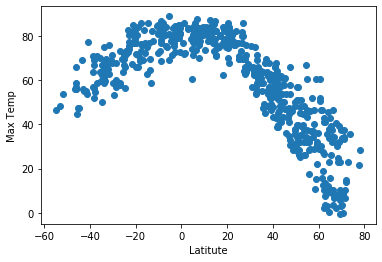

In [36]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"])
plt.xlabel("Latitute")
plt.ylabel("Max Temp")
plt.savefig("../output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

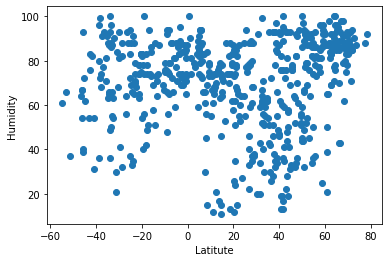

In [40]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"])
plt.xlabel("Latitute")
plt.ylabel("Humidity")
plt.savefig("../output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

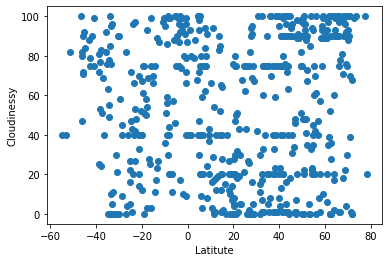

In [39]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"])
plt.xlabel("Latitute")
plt.ylabel("Cloudinessy")
plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

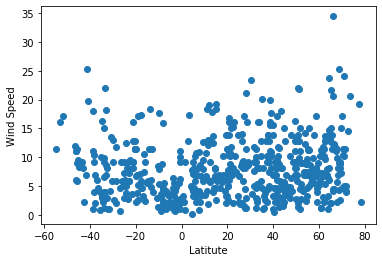

In [41]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"])
plt.xlabel("Latitute")
plt.ylabel("Wind Speed")
plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression

In [43]:
# OPTIONAL: Create a function to create Linear Regression plots
north=clean_city_data[clean_city_data["Lat"]>0]
south=clean_city_data[clean_city_data["Lat"]<0]



In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

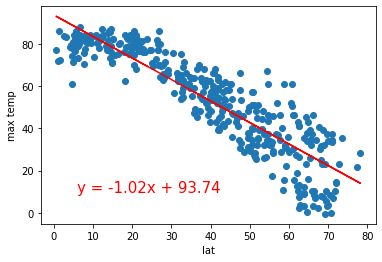

In [46]:
import scipy.stats as st
x_values = north["Lat"]
y_values = north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lat')
plt.ylabel('max temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression